**Importing the necessary libraries**

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.ensemble import HistGradientBoostingRegressor

**Loading the dataset**

Pre processing and clearning the dataset

In [2]:
#Get your dataset into our working directory
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving insurance.csv to insurance.csv
User uploaded file "insurance.csv" with length 55628 bytes


In [3]:
# Load the dataset from a CSV file
Dataset = pd.read_csv('insurance.csv')

In [4]:
# Display the first few rows of the loaded dataset
Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
Dataset.shape

(1338, 7)

In [6]:
#summary of the data
Dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
#Check if there a missing values
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Get the shape of the dataset
Dataset.shape

(1338, 7)

In [9]:
# Check for any missing values
print("Missing Values:\n", Dataset.isnull().sum())  # Count of missing values in each column

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [10]:
# Check for any duplicate rows
print("Duplicate Rows:", Dataset.duplicated().sum())  # Count of duplicate rows

Duplicate Rows: 1


In [11]:
# Handle missing values (if any)
# For example, fill missing values with the mean of the column
Dataset.fillna(Dataset.mean(), inplace=True)

<ipython-input-11-dbc7208903d9>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Dataset.fillna(Dataset.mean(), inplace=True)


In [12]:
# Check for any missing values again
print("Missing Values:\n", Dataset.isnull().sum())  # Count of missing values in each column

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [13]:
# Check for missing values in the dataset
Dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
# Get the shape of the dataset
Dataset.shape

(1338, 7)

In [15]:
# Display the first few rows of the loaded dataset
Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


As it is visible that there are categorical as well as numerical values in the dataset and can be inferred that the data is not balanced or even

Hence indentifying the numerical as well as the categorical columns

In [16]:
# Create a list to store all numerical variable
numerical_feature = [feature for feature in Dataset.columns if Dataset[feature].dtypes not in ['O', 'object'] ]

print("Number of Numerical Variable ", len(numerical_feature))

Dataset[numerical_feature].head()

Number of Numerical Variable  4


,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [17]:
# Create a list to store all Categorical variable
categorical_feature = [feature for feature in Dataset.columns if Dataset[feature].dtypes  in ['O', 'object'] ]

print("Number of Categorical Variable ", len(categorical_feature))

Dataset[categorical_feature].head()

Number of Categorical Variable  3


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


Data visualisation using heatmap for correlation

<ipython-input-18-ac1671005dd8>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Dataset.corr())


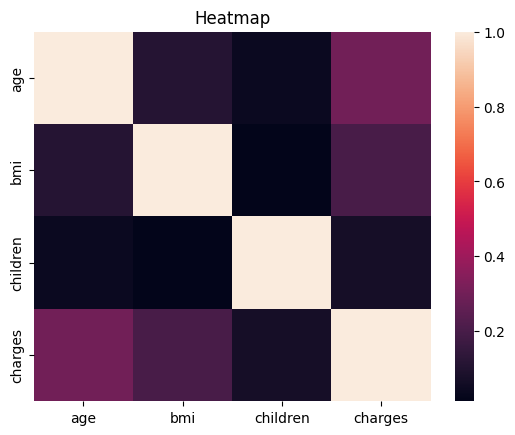

In [18]:
# create a heatmap in seaborn to see which varaibles are highly correlated with y
#after handling missing values 

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(Dataset.corr())
plt.title('Heatmap')
plt.show()

From Correlation it can be understood that the age feature is more correlated to the target variable which is the charges

Plotting the relationship between the target variable and other features

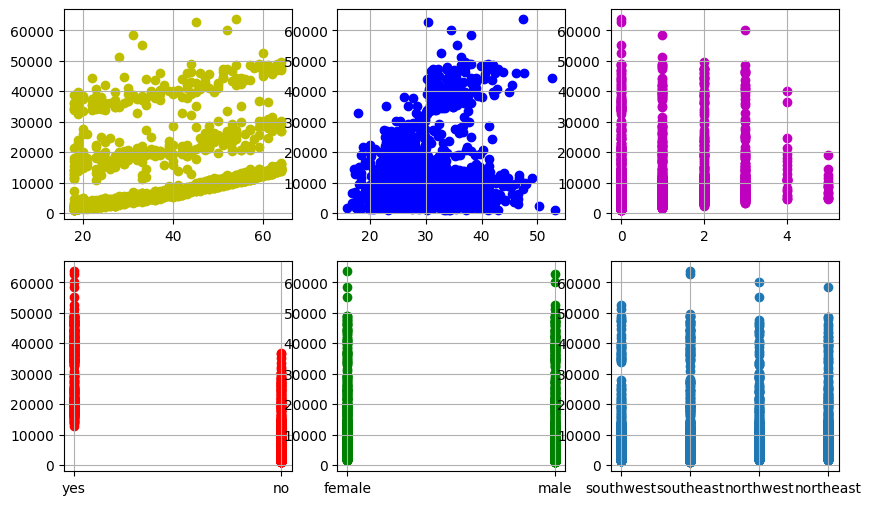

In [19]:
#scatterplots of every feature against target
plt.rcParams["figure.figsize"] = (10,6) 
plt.subplot(2,3,1)
x1=Dataset["age"]
y1=Dataset["charges"]
plt.scatter(x1,y1,c='y')
plt.grid()

plt.subplot(2,3,2)
x2=Dataset["bmi"]
y2=Dataset["charges"]
plt.scatter(x2,y2,c='b')
plt.grid()

plt.subplot(2,3,3)
x3=Dataset["children"]
y3=Dataset["charges"]
plt.scatter(x3,y3,c='m')
plt.grid()

plt.subplot(2,3,4)
x4=Dataset["smoker"]
y4=Dataset["charges"]
plt.scatter(x4,y4,c='r')
plt.grid()

plt.subplot(2,3,5)
x5=Dataset["sex"]
y5=Dataset["charges"]
plt.scatter(x5,y5,c='g')
plt.grid()

plt.subplot(2,3,6)
x5=Dataset["region"]
y5=Dataset["charges"]
plt.scatter(x5,y5)
plt.grid()

<ipython-input-20-91f35a4d0a1f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dataset[feature])


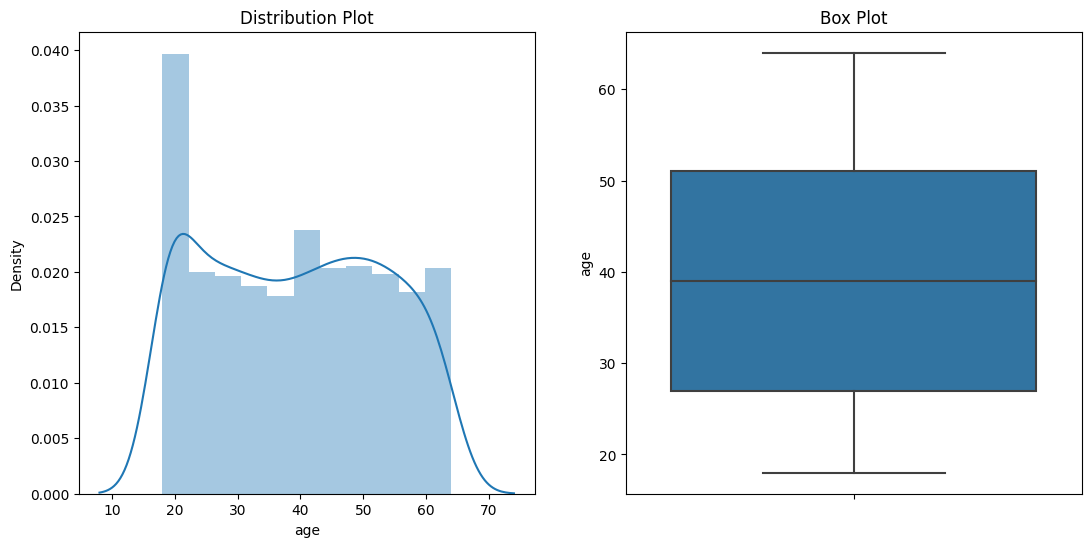

<ipython-input-20-91f35a4d0a1f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dataset[feature])


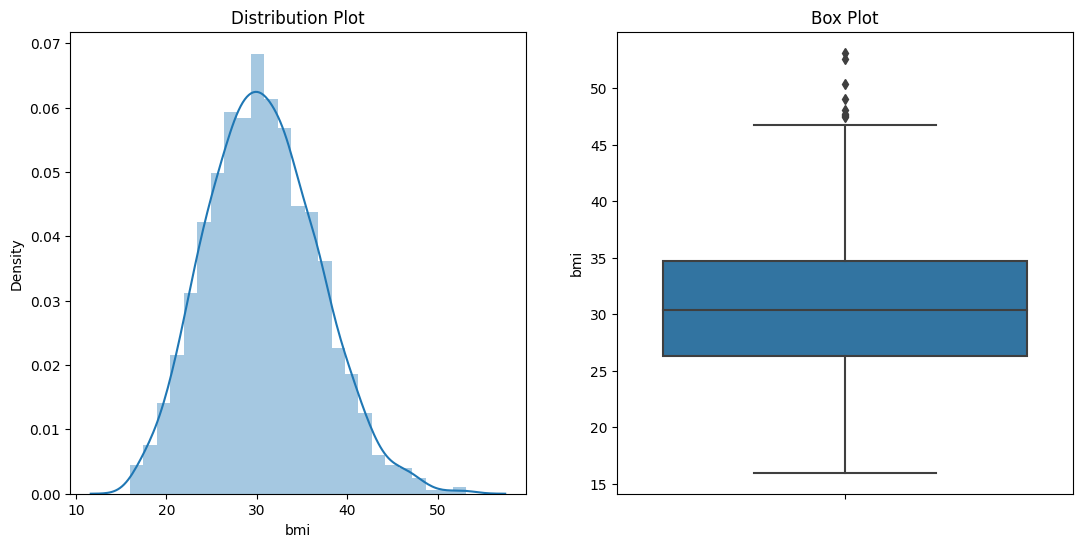

In [20]:
#As these are two numerical values lets check how are they correlated
#displaying how age and bmi are related to target variable 
for feature in ['age', 'bmi']:
    plt.figure(figsize=(20,6))

    plt.subplot(1,3,2)
    plt.title('Distribution Plot')
    sns.distplot(Dataset[feature])

    plt.subplot(1,3,3)
    plt.title('Box Plot')
    sns.boxplot(y=Dataset[feature])

    plt.show()

In [21]:
#Lets display some grapghs for observed the categorical_features
categorical_feature

['sex', 'smoker', 'region']

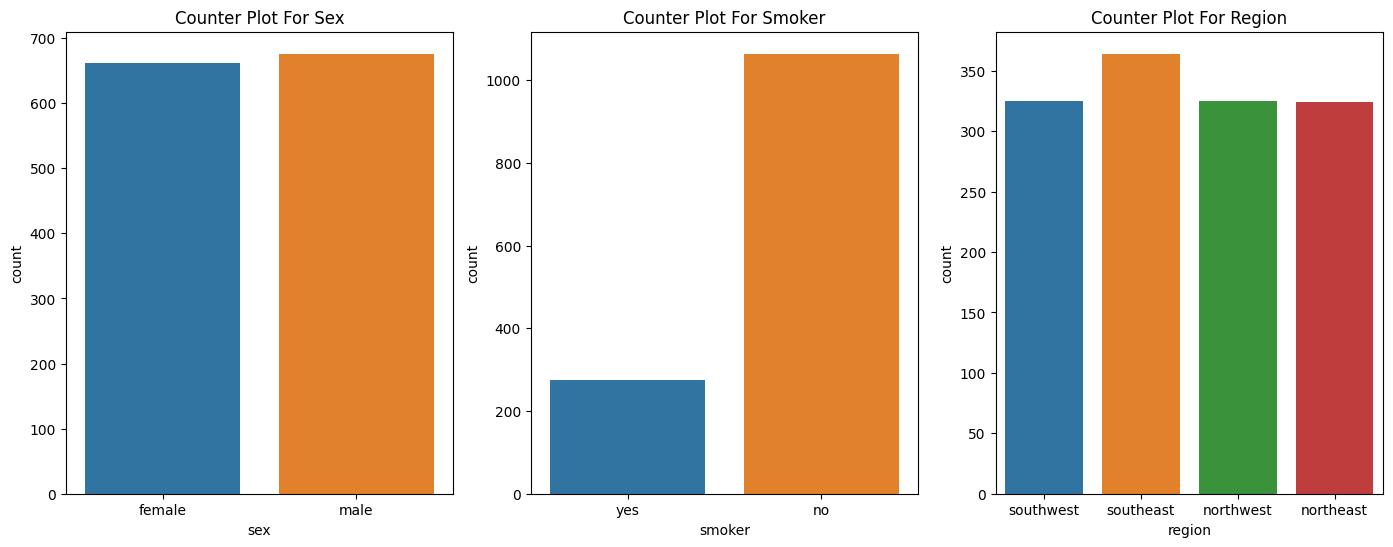

In [22]:
#Displaying the for categorical features with suitable plots

plt.figure(figsize=(17,6))

plt.subplot(1,3,1)
plt.title("Counter Plot For Sex")
sns.countplot(x = "sex", data = Dataset)

plt.subplot(1,3,2)
plt.title("Counter Plot For Smoker")
sns.countplot(x = "smoker", data = Dataset)

plt.subplot(1,3,3)
plt.title("Counter Plot For Region")
sns.countplot(x = "region", data = Dataset)

plt.show()

In [23]:
#Identifying the correlation 
cor = Dataset.corr()
cor

<ipython-input-23-b4047b9b90cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = Dataset.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [24]:
# Using encoding technique for convering all the categorcal variables into numerical variables 
#using onehot ecnode since the data does not follow any order
dataset = pd.get_dummies(Dataset)
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


**Spliting the whole dataset into the X and the y sets**

Since Charges is the y varibale, it is dropped from the X column.

In [25]:
# Defining the x and y datasets
# not dropping any features now as the feature dropping is obsered to have decreased the accuracy
y = dataset["charges"]
X = dataset.drop(["charges"], axis=1)

Scaling method used for X

In [26]:
# Scale the X_variable using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# further spiltng the data into 80% and 20% for testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [28]:
# printing the print("Shape of Training dataset: ", X_train.shape)
print("Shape of Testing dataset: ", X_test.shape)
print("Shape of Training dataset: ", X_train.shape)

Shape of Testing dataset:  (335, 11)
Shape of Training dataset:  (1003, 11)


**Model Evaluation**

**Evaluating with the Linear regression model**

In [29]:
# importing the necessary libraries 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [31]:
# Model Evulation
score = linear_model.score(X_test, y_test)
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)
rmse = np.sqrt(mse)

print("Linear Regression Model Score is {}".format(score))
print("Mean squared error is {}".format(mse))
print("Mean abosolute error is {}".format(mae))
print("The RMSE is {}".format(rmse))
print("The R2 is {}".format(r2))

Linear Regression Model Score is 0.7672642952734356
Mean squared error is 35117755.73613632
Mean abosolute error is 4243.654116653143
The RMSE is 5926.023602394469
The R2 is 0.6843075030980533


**Random Forrest Regression Model**

In [32]:
#Buidlign a Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [33]:
# Model Evulation
score = rf_model.score(X_test, y_test)
mae = mean_absolute_error(rf_pred, y_test)
mse = mean_squared_error(rf_pred, y_test)
r2 = r2_score(rf_pred, y_test)
rmse = np.sqrt(mse)

print("RF Model Score is {}".format(score))
print("Mean squared error is {}".format(mse))
print("Mean abosolute error is {}".format(mae))
print("The RMSE is {}".format(rmse))
print("The R2 is {}".format(r2))

RF Model Score is 0.8506220578435091
Mean squared error is 22539807.938715447
Mean abosolute error is 2599.0156276752246
The RMSE is 4747.610761079245
The R2 is 0.843460981550147


**XG Boost Algorithm Regression model**

In [34]:
#creating the xgb model 
xgb_model = xgb.XGBRegressor(n_estimators=100)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [35]:
# Model Evulation
xgb_score = xgb_model.score(X_test, y_test)
mae = mean_absolute_error(xgb_pred, y_test)
mse = mean_squared_error(xgb_pred, y_test)
r2 = r2_score(xgb_pred, y_test)
rmse = np.sqrt(mse)

print("The Score For  XGB Model is {}".format(xgb_score))
print("The MSE For  XGB is {}".format(mse))
print("The MAE XGB Model is {}".format(mae))
print("The RMSE For XGB Model is {}".format(rmse))
print("The R2 For XGB Model is {}",format(r2))

The Score For  XGB Model is 0.8262012287304634
The MSE For  XGB is 26224694.67611331
The MAE XGB Model is 2797.357326435856
The RMSE For XGB Model is 5121.005240781668
The R2 For XGB Model is {} 0.820968755796238


In [36]:
xgb_score

0.8262012287304634

In [37]:
# Predicting the values for any given data points
predicted = rf_model.predict([[32, 23.5,1,1, 0, 0, 1, 0, 0,1, 0]])
print('Predicted Chareg for given patient = ', predicted)

Predicted Chareg for given patient =  [48745.2395382]


Defining a 2D array for capturing the values and then creating a dummy calcultor that will predict the values on the basis of the given data


In [38]:
sample_data = [[10, 20,1,0, 1, 0, 1, 0, 0,1, 0]]
sample_df = pd.DataFrame(sample_data,
                         columns = ['age',	'bmi',	'children',	'sex_female',	'sex_male',	'smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast',	'region_southwest'])

In [39]:
sample_df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,10,20,1,0,1,0,1,0,0,1,0


In [40]:
# Prediction using XBG
predicted = xgb_model.predict(sample_df)
print('Charges for given patient is = ', predicted)

Charges for given patient is =  [49306.09]


In [41]:
# Predicting using the random forrest
predicted = rf_model.predict(sample_df)
print('Charges for given patient is = ', predicted)

Charges for given patient is =  [48879.1835827]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [42]:
# Predicting using the linear 
predicted = linear_model.predict(sample_df)
print('Charges for given patient is = ', predicted)

Charges for given patient is =  [395023.15959715]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


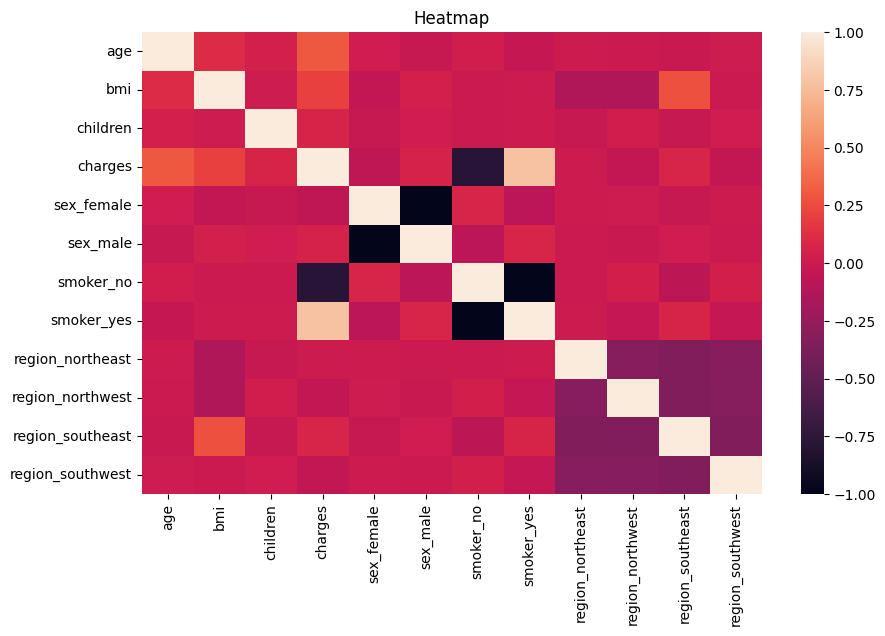

In [44]:
# create a heatmap in seaborn to see which varaibles are highly correlated with y
#after handling missing values 

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dataset.corr())
plt.title('Heatmap')
plt.show()